In [ ]:
%pip install --upgrade pip
%pip install python2verilog[full]

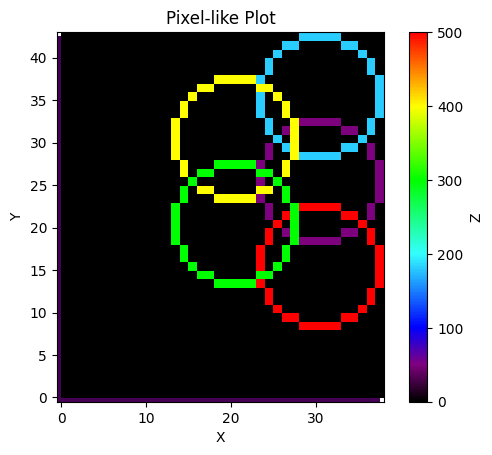

/*

# Python Function
@verilogify(namespace=ns)
def circle(centre_x, centre_y, radius, color):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y, color)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x, color)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y, color)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x, color)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y, color)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x, color)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y, color)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x, color)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (of

In [10]:
from pathlib import Path
import random
from python2verilog import verilogify, namespace_to_verilog, get_namespace
from python2verilog.utils import make_visual

ns = get_namespace("./notebook")


@verilogify(namespace=ns)
def circle(centre_x, centre_y, radius, color):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y, color)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x, color)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y, color)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x, color)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y, color)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x, color)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y, color)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x, color)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1

@verilogify(namespace=ns)
def logo(mid_x, mid_y, radius):
    spread = radius - 2
    gen = circle(mid_x, mid_y + spread, radius, 50)
    for x, y, color in gen:
        yield x, y, color
    gen = circle(mid_x + spread * 2, mid_y + spread, radius, 180)
    for x, y, color in gen:
        yield x, y, color
    gen = circle(mid_x - spread * 2, mid_y + spread, radius, 500)
    for x, y, color in gen:
        yield x, y, color
    gen = circle(mid_x + spread, mid_y - spread, radius, 400)
    for x, y, color in gen:
        yield x, y, color
    gen = circle(mid_x - spread, mid_y - spread, radius, 300)
    for x, y, color in gen:
        yield x, y, color

make_visual(logo(25, 25, 7))

module, testbench = namespace_to_verilog(ns)

print(module)
print(testbench)
